<h1 style='text-align: center'>Santander Customer Satisfation</h1>
<h2 style='text-align: center'>Gustavo Moreira</h2>
<h2 style='text-align: center'>27/07/2019</h2>

Este trabalho foi sugerido pela [Data Science Academy](https://www.datascienceacademy.com.br/) durante o curso 'Formação Cientista de Dados'. Os dados utilizados estão disponíveis na competição [Santander Customer Satisfation](https://www.kaggle.com/c/santander-customer-satisfaction/overview)

# Introdução

Para qualquer empresa, o nível de satisfação do cliente é uma das principais métricas de sucesso. Clientes insatisfeitos não costumam permanecer em contato por muito tempo e tendem a buscar soluções para seus problemas nos concorrentes.


Se identificarmos antecipadamente quais clientes estão insatisfeitos com os serviços prestados pela empresa, poderemos aplicar técnicas direcionadas a esse grupo para compreender suas frustrações, buscar feedback e possivelmente convertê-los ao grupo de clientes satisfeitos, mantendo-os em contato com a empresa por mais tempo.


O [Banco Santander](https://www.santanderbank.com/us/personal) já realiza este trabalho. Eles [disponibilizaram](https://www.kaggle.com/c/santander-customer-satisfaction/overview) centenas de variáveis anônimas sobre seus clientes e lançaram o desafio: identificar quais clientes estão satisfeitos ou insatisfeitos com os serviços prestados pelo banco.


# Definindo o problema de negócio

**Objetivo**: Identificar quais clientes estão satisfeitos e insatisfeitos com base nos dados disponíveis

**Meta**: Desenvolver um modelo preditivo que consiga obter pelo menos 70% de acurácia.

**Observações**: Todas variáveis foram anonimizadas de forma que não seja possíveis identificar informações reais sobre os clientes do banco.

# Observação dos dados disponíveis

In [1]:
#Libs
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from os import listdir

#Configurando Pandas para exibir dados float em formato decimal ao invés de científico
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
#Listando dados disponíveis
files = listdir('../input/')
print(files)

['train.csv', 'zip_files', 'test.csv', 'sample_submission.csv']


Foram disponibilizados três arquivos:

* train.csv: Dados para treino do modelo preditivo
* test.csv: Dados para teste do modelo preditivo
* sample_submission.csv: Template para apresentação dos resultados no Kaggle

In [3]:
#Carregando dados
df_train = pd.read_csv('../input/' + files[0])
df_test = pd.read_csv('../input/' + files[2])

In [4]:
#Observando a variável target
df_train.TARGET.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

**TARGET** é a variável que estamos tentando prever e representa a satisfação do cliente: 0 = Satisfeito e 1 = Insatisfeito.

Existe uma proporção muito maior de clientes satisfeitos. Para identificar quais características representam melhor a insatisfação do cliente, selecionaremos uma amostra balanceada destas duas ocorrências.

In [5]:
#Selecionando todos clientes insatisfeitos
unsatisfied_index = df_train[df_train.TARGET > 0].index

#E então selecionamos aleatoriamente alguns clientes satisfeitos
satisfied_index = df_train[df_train.TARGET == 0].sample(len(unsatisfied_index), random_state = 5).index

#Agrupamos estes dois conjuntos
train_sample = pd.concat([df_train.iloc[satisfied_index],df_train.iloc[unsatisfied_index]], axis=0)
print(train_sample.TARGET.value_counts())

1    3008
0    3008
Name: TARGET, dtype: int64


In [6]:
#Dimensão dos datasets
print(df_train.shape)
print(df_test.shape)

(76020, 371)
(75818, 370)


Existem mais de 70.000 observações, 371 variáveis no dataset de treino e 370 no dataset de teste.

In [7]:
set(df_train.drop('TARGET', axis=1).columns == df_test.columns)

{True}

Com exceção da variável TARGET, as demais 370 colunas estão disponíveis em ambos datasets.

In [8]:
#Tipos de variáveis
df_train.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

Todas variáveis disponíveis estão em formato numérico.

In [9]:
#Valores faltantes no dataset de treino
train_na_cols = df_train.isnull().sum()
train_na_cols = train_na_cols[train_na_cols > 0]
print(train_na_cols)

#Valores faltantes no dataset de teste
test_na_cols = df_test.isnull().sum()
test_na_cols = test_na_cols[test_na_cols > 0]
print(test_na_cols)

Series([], dtype: int64)
Series([], dtype: int64)


Não há nenhuma observação com valores NA em ambos conjuntos.

# Análise exploratória

Vamos observar quais variáveis temos disponíveis para desenvolver este trabalho:

In [10]:
#Nome das variáveis
sorted(list(df_train.columns))

['ID',
 'TARGET',
 'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_imp_aport_var13_1y3',
 'delta_imp_aport_var17_1y3',
 'delta_imp_aport_var33_1y3',
 'delta_imp_compra_var44_1y3',
 'delta_imp_reemb_var13_1y3',
 'delta_imp_reemb_var17_1y3',
 'delta_imp_reemb_var33_1y3',
 'delta_imp_trasp_var17_in_1y3',
 'delta_imp_trasp_var17_out_1y3',
 'delta_imp_trasp_var33_in_1y3',
 'delta_imp_trasp_var33_out_1y3',
 'delta_imp_venta_var44_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_trasp_var33_out_1y3',
 'delta_num_venta_var44_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_hace3',
 'imp_amort_var34_ult1',
 'imp_aport_var13_hace3',
 'imp_aport_var13_ult1',
 'imp_aport_var17_h

O nome das variáveis possui características semelhantes, tais como 'delta' e 'saldo'. Faremos uma separação dessas colunas em grupos reduzidos para uma análise mais pontual:

In [11]:
colgroups = list(set([x.split('_')[0] for x in df_train.columns]))
sorted(colgroups)

['ID',
 'TARGET',
 'delta',
 'imp',
 'ind',
 'num',
 'saldo',
 'var15',
 'var21',
 'var3',
 'var36',
 'var38']

Com esse procedimento, podemos agrupar as variáveis nos seguintes grupos:

* Delta
* Imp
* Ind
* Num
* Saldo
* Var

In [12]:
#Variável target
train_sample_y = train_sample.TARGET

#Demais datasets
train_sample_delta = train_sample.filter(regex='^delta')
train_sample_imp = train_sample.filter(regex='^imp')
train_sample_ind = train_sample.filter(regex='^ind')
train_sample_num = train_sample.filter(regex='^num')
train_sample_saldo = train_sample.filter(regex='^saldo')
train_sample_var = train_sample.filter(regex='^var')

In [13]:
train_sample_delta.describe().T

,count,mean,std,min,25%,50%,75%,max
delta_imp_amort_var18_1y3,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
delta_imp_amort_var34_1y3,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
delta_imp_aport_var13_1y3,6016.00,36569148.92,603667757.05,-1.00,0.00,0.00,0.00,9999999999.00
delta_imp_aport_var17_1y3,6016.00,3324468.08,182316082.35,0.00,0.00,0.00,0.00,9999999999.00
delta_imp_aport_var33_1y3,6016.00,-0.00,0.01,-1.00,0.00,0.00,0.00,0.00
delta_imp_compra_var44_1y3,6016.00,6648936.17,257791000.45,-1.00,0.00,0.00,0.00,9999999999.00
delta_imp_reemb_var13_1y3,6016.00,3324468.08,182316082.35,0.00,0.00,0.00,0.00,9999999999.00
delta_imp_reemb_var17_1y3,6016.00,3324468.08,182316082.35,0.00,0.00,0.00,0.00,9999999999.00
delta_imp_reemb_var33_1y3,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
delta_imp_trasp_var17_in_1y3,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [14]:
train_sample_imp.describe().T

,count,mean,std,min,25%,50%,75%,max
imp_ent_var16_ult1,6016.00,77.60,1093.63,0.00,0.00,0.00,0.00,51003.00
imp_op_var39_comer_ult1,6016.00,80.86,404.32,0.00,0.00,0.00,0.00,12888.03
imp_op_var39_comer_ult3,6016.00,123.30,545.06,0.00,0.00,0.00,0.00,13183.23
imp_op_var40_comer_ult1,6016.00,4.79,113.75,0.00,0.00,0.00,0.00,6300.69
imp_op_var40_comer_ult3,6016.00,6.85,147.03,0.00,0.00,0.00,0.00,7209.93
imp_op_var40_efect_ult1,6016.00,1.66,44.66,0.00,0.00,0.00,0.00,1800.00
imp_op_var40_efect_ult3,6016.00,2.35,61.88,0.00,0.00,0.00,0.00,3000.00
imp_op_var40_ult1,6016.00,3.30,69.65,0.00,0.00,0.00,0.00,2986.98
imp_op_var41_comer_ult1,6016.00,76.07,376.48,0.00,0.00,0.00,0.00,12888.03
imp_op_var41_comer_ult3,6016.00,116.46,508.96,0.00,0.00,0.00,0.00,13183.23


In [15]:
train_sample_ind.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_var1_0,6016.00,0.01,0.10,0.00,0.00,0.00,0.00,1.00
ind_var1,6016.00,0.01,0.07,0.00,0.00,0.00,0.00,1.00
ind_var2_0,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ind_var2,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ind_var5_0,6016.00,0.94,0.23,0.00,1.00,1.00,1.00,1.00
ind_var5,6016.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
ind_var6_0,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ind_var6,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ind_var8_0,6016.00,0.05,0.23,0.00,0.00,0.00,0.00,1.00
ind_var8,6016.00,0.04,0.20,0.00,0.00,0.00,0.00,1.00


In [16]:
train_sample_num.describe().T

,count,mean,std,min,25%,50%,75%,max
num_var1_0,6016.00,0.03,0.32,0.00,0.00,0.00,0.00,6.00
num_var1,6016.00,0.02,0.22,0.00,0.00,0.00,0.00,3.00
num_var4,6016.00,0.90,0.98,0.00,0.00,1.00,1.00,6.00
num_var5_0,6016.00,2.85,0.75,0.00,3.00,3.00,3.00,6.00
num_var5,6016.00,1.55,1.51,0.00,0.00,3.00,3.00,6.00
num_var6_0,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
num_var6,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
num_var8_0,6016.00,0.16,0.68,0.00,0.00,0.00,0.00,3.00
num_var8,6016.00,0.12,0.59,0.00,0.00,0.00,0.00,3.00
num_var12_0,6016.00,0.14,1.55,0.00,0.00,0.00,0.00,111.00


In [17]:
train_sample_saldo.describe().T

,count,mean,std,min,25%,50%,75%,max
saldo_var1,6016.00,7.81,153.58,0.00,0.00,0.00,0.00,7214.67
saldo_var5,6016.00,644.24,6024.53,-2895.72,0.00,1.50,20.73,179160.00
saldo_var6,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
saldo_var8,6016.00,113.63,1489.07,-798.48,0.00,0.00,0.00,60098.49
saldo_var12,6016.00,2883.02,27477.80,0.00,0.00,0.00,0.00,668885.04
saldo_var13_corto,6016.00,2623.59,23670.17,0.00,0.00,0.00,0.00,450000.00
saldo_var13_largo,6016.00,778.30,12937.03,0.00,0.00,0.00,0.00,450000.00
saldo_var13_medio,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
saldo_var13,6016.00,3401.89,27043.72,0.00,0.00,0.00,0.00,450000.00
saldo_var14,6016.00,34.53,1707.10,0.00,0.00,0.00,0.00,129014.79


In [18]:
train_sample_var.describe().T

,count,mean,std,min,25%,50%,75%,max
var3,6016.00,-1825.96,42724.97,-999999.00,2.00,2.00,2.00,225.00
var15,6016.00,36.19,12.84,9.00,25.00,33.00,44.00,102.00
var36,6016.00,52.15,48.44,0.00,2.00,99.00,99.00,99.00
var21,6016.00,29.57,479.53,0.00,0.00,0.00,0.00,30000.00
var38,6016.00,110188.36,176270.89,11136.63,61953.18,95826.74,117310.98,9792857.49


As principais características que observei nessas variáveis:

* Grande parte dos registros estão preenchidos com zeros;
* Alguns registros foram cadastrados com números excessivamente largos, tal como '9999999999.00' no grupo Delta e '-999999.00' na variável 'var3'.

Precisamos olhar essas variáveis por outras perspectivas para buscar compreender seu significado.

## Seleção de variáveis

Para cada variável, calculamos as seguintes métricas:

* Quantidade de observações preenchidas com zeros;
* Quantidade de valores distintos;
* Média;
* Mediana;
* Máximo.

In [19]:
df_zero_count = (train_sample == 0).sum()
df_uniques = train_sample.nunique()
df_mean = train_sample.mean()
df_median = train_sample.median()
df_max = train_sample.max()

#Juntamos estes dados em um único DataFrame
df_zero_means = pd.concat([df_zero_count, df_uniques, df_mean, df_median, df_max], axis=1).reset_index()
df_zero_means.columns = ['Column','Zero_count','Unique_count','Mean','Median','Max']
df_zero_means

,Column,Zero_count,Unique_count,Mean,Median,Max
0,ID,0,6016,76265.20,76597.50,151811.00
1,var3,7,41,-1825.96,2.00,225.00
2,var15,0,79,36.19,33.00,102.00
3,imp_ent_var16_ult1,5708,128,77.60,0.00,51003.00
4,imp_op_var39_comer_ult1,5260,719,80.86,0.00,12888.03
5,imp_op_var39_comer_ult3,5124,845,123.30,0.00,13183.23
6,imp_op_var40_comer_ult1,5987,30,4.79,0.00,6300.69
7,imp_op_var40_comer_ult3,5982,35,6.85,0.00,7209.93
8,imp_op_var40_efect_ult1,6005,10,1.66,0.00,1800.00
9,imp_op_var40_efect_ult3,6003,11,2.35,0.00,3000.00


Dessa forma, temos uma visão mais resumida dos dados cadastrados e podemos aplicar algumas regras.

* Descartamos as variáveis sem variação entre registros (todas ocorrências são iguais):
* Selecionamos as variáveis binárias.

In [20]:
#Selecionando as variáveis binárias
keep_binary_cols = list(df_zero_means.loc[(df_zero_means.Unique_count == 2) & (df_zero_means.Mean <= 1) & (df_zero_means.Max == 1),:].index)
print(len(keep_binary_cols), 'colunas com valores binários')

#Colunas sem variação
drop_invariable_cols = list(df_zero_means[df_zero_means.Unique_count == 1].index)
print(len(drop_invariable_cols), 'colunas sem variação')

56 colunas com valores binários
105 colunas sem variação


In [21]:
#Retiramos estes valores antes de continuar a análise
df_selected_vars = df_zero_means.drop(drop_invariable_cols, axis = 0).drop(keep_binary_cols, axis = 0)

Dos registros que sobraram:

* Retiramos as colunas que possuem mais de 50% dos valores preenchidos com zeros;
* Mantemos o restante dos registros que sobrar, pois provavelmente tratam-se de variáveis numéricas contínuas.

In [22]:
#Colunas com mais da metade = 0
drop_zero_median_cols = list(df_selected_vars[df_selected_vars.Median == 0].index)
print(len(drop_zero_median_cols), 'colunas com mais de 50% zeros')

#Restante dos dados
df_numeric_data = df_selected_vars.drop(drop_zero_median_cols)

187 colunas com mais de 50% zeros


Aplicando essas técnicas, separamos as colunas em dois grupos: binárias (apenas dois valores possíveis) e contínuas (sequência de valores possíveis em um certo intervalo)

### Variáveis binárias

In [23]:
#Agrupamos as colunas que identificamos como binárias
binary_colnames = list(df_zero_means.loc[keep_binary_cols,:].Column)

#Buscamos estas colunas no dataset original
df_binary_vars = train_sample.filter(items=binary_colnames, axis = 1)
df_binary_vars

,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,...,ind_var44_0,ind_var44,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,TARGET
64665,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49797,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44206,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72949,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30008,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37868,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44900,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4341,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1041,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44396,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Precisamos identificar se essas colunas ajudam a descrever o nível de satisfação do cliente. Para isso, desenhamos uma matriz de correlação entre as variáveis e identificamos quais registros estão mais correlacionados com a variável TARGET, lembrando que 0 = Satisfeito e 1 = Insatisfeito:

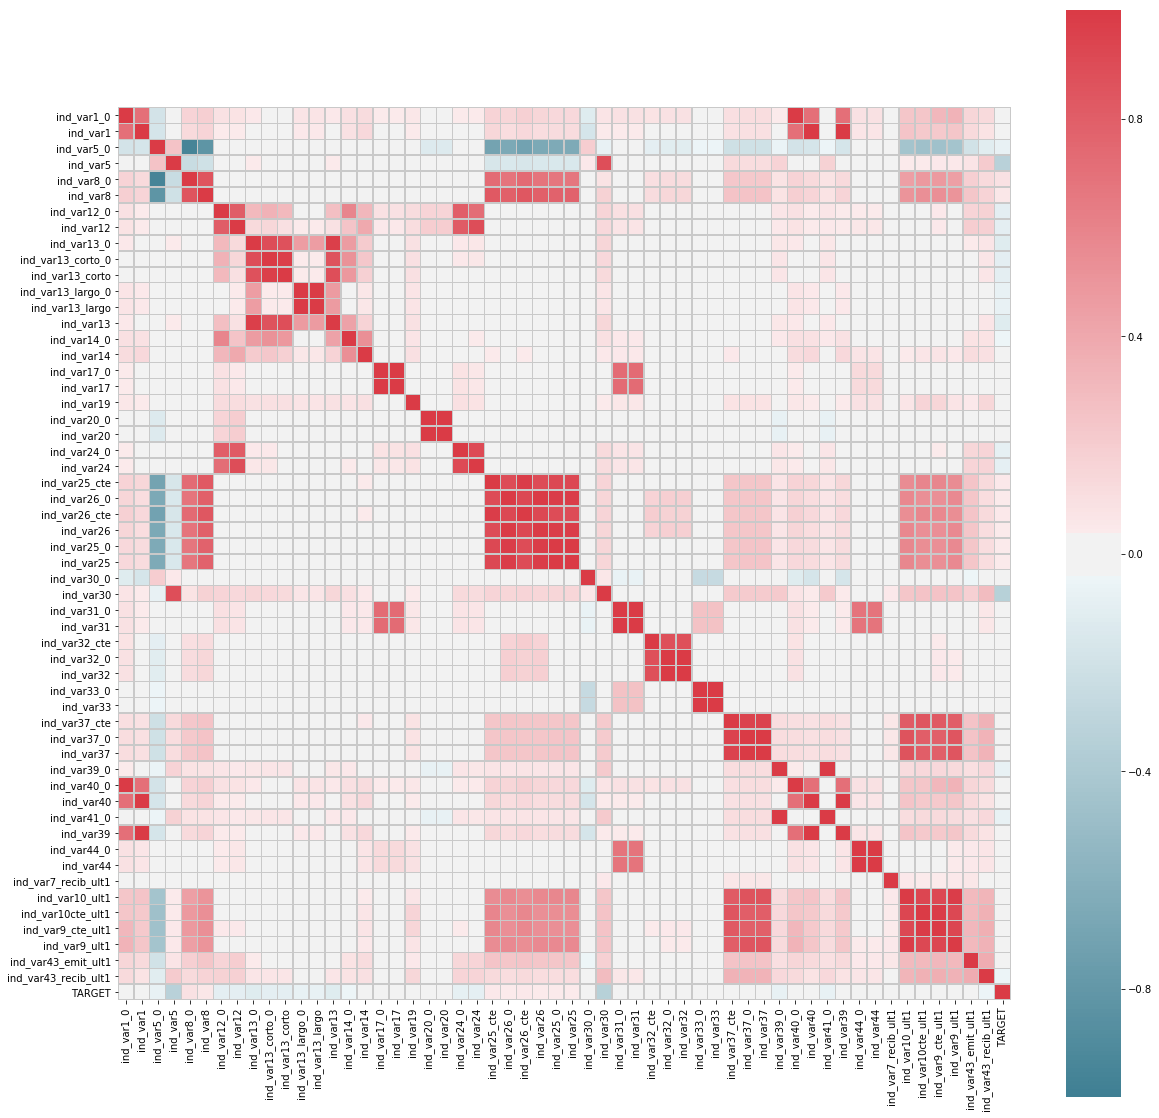

In [24]:
# Matriz de correlação
binary_corr = df_binary_vars.corr()

fig, axis = plt.subplots(figsize=(20,20))
corr_cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(binary_corr, cmap=corr_cmap,
            linewidths=.5, linecolor='#c9c9c9', vmin=-1, vmax=1,
            square=True, xticklabels=True, yticklabels=True)

As variáveis que mais se destacam:

* **ind_var5** e **ind_var30**: As duas apresentaram maior correlação negativa, sugerindo que o valor preenchido pode ser utilizado para identificar clientes **satisfeitos**. Entre si, essas duas variáveis estão fortemente correlacionadas, sugerindo alta probabilidade de ambas estarem preenchidas com o mesmo valor.

* **ind_var8_0**: Esta é a variável com maior correlação positiva, sugerindo que seu valor auxilia a identificar clientes **insatisfeitos**. Entretanto, essa variável também está positivamente correlacionada com todas as demais **ind_var25** e **ind_var26** que apresentaram correlação positiva com a variável TARGET, sugerindo que a informação representada por estas variáveis seja similar. Para não criar um modelo tendencioso, apenas a **ind_var8_0** será utilizada.

Das variáveis binárias, utilizaremos as três destacadas acima durante o treinamento do modelo preditivo.

### Variáveis contínuas

In [25]:
df_numeric_data

,Column,Zero_count,Unique_count,Mean,Median,Max
0,ID,0,6016,76265.20,76597.50,151811.00
1,var3,7,41,-1825.96,2.00,225.00
2,var15,0,79,36.19,33.00,102.00
89,num_var4,2474,7,0.90,1.00,6.00
90,num_var5_0,348,3,2.85,3.00,6.00
91,num_var5,2914,3,1.55,3.00,6.00
138,num_var30_0,15,6,3.24,3.00,114.00
139,num_var30,2552,5,1.84,3.00,12.00
148,num_var35,2474,9,2.76,3.00,27.00
152,num_var39_0,893,5,2.64,3.00,12.00


Observando a média, mediana, valores distintos e valor máximo, as variáveis que aparentam melhor representar dados contínuos são:

* saldo_var5
* saldo_var30
* saldo_var42
* saldo_medio_var5_hace2
* saldo_medio_var5_ult1
* saldo_medio_var5_ult3
* var38

As demais variáveis possuem menor variação de valores distintos, possivelmente representando algum ID ou valor codificado. São elas:

* num_var4
* num_var5_0
* num_var5
* num_var30_0
* num_var30
* num_var35
* num_var39_0
* num_var41_0
* num_var42_0
* num_var42
* var_36
* num_meses_var5_ult3
* num_meses_var39_vig_ult3

As variáveis restantes possuem características dos dois grupos e necessitarão de uma análise mais detalhada para compreendermos seu significado:

* var3
* var15

In [26]:
#Separamos listas dessas variáveis para fazer uma análise específica
continous_vars = ['saldo_var5','saldo_var30','saldo_var42',
                  'saldo_medio_var5_hace2','saldo_medio_var5_ult1',
                  'saldo_medio_var5_ult3','var38']

num_cat_vars = ['num_var4','num_var5','num_var5_0','num_var30',
                'num_var30_0','num_var35','num_var39_0',
                'num_var41_0','num_var42_0','num_var42','var36',
                'num_meses_var5_ult3','num_meses_var39_vig_ult3']

unkown_vars = ['var3', 'var15']

#### Variáveis contínuas - Grupo 1

In [27]:
df_continous_vars = train_sample.loc[:,continous_vars]
df_continous_vars.describe().T

,count,mean,std,min,25%,50%,75%,max
saldo_var5,6016.00,644.24,6024.53,-2895.72,0.00,1.50,20.73,179160.00
saldo_var30,6016.00,7042.78,39073.85,-2895.72,0.00,3.00,90.00,668885.04
saldo_var42,6016.00,3640.89,28163.05,-2895.72,0.00,3.00,60.00,668885.04
saldo_medio_var5_hace2,6016.00,871.05,7248.24,-47.13,0.00,3.00,39.83,217818.78
saldo_medio_var5_ult1,6016.00,600.12,4888.20,-733.05,0.00,3.00,30.00,150006.00
saldo_medio_var5_ult3,6016.00,597.80,4732.28,-173.64,0.00,2.07,42.66,123000.00
var38,6016.00,110188.36,176270.89,11136.63,61953.18,95826.74,117310.98,9792857.49


Essas variáveis parecem estar relacionadas ao saldo bancário do cliente sob diferentes perspectivas.

A variável 'var38' não possui valores negativos e agrupa um elevado range de valores. Uma possível explicação é que esta variável representa o maior saldo já disponível na conta de cada cliente.

Vamos adicionar a variável TARGET e identificar as correlações:

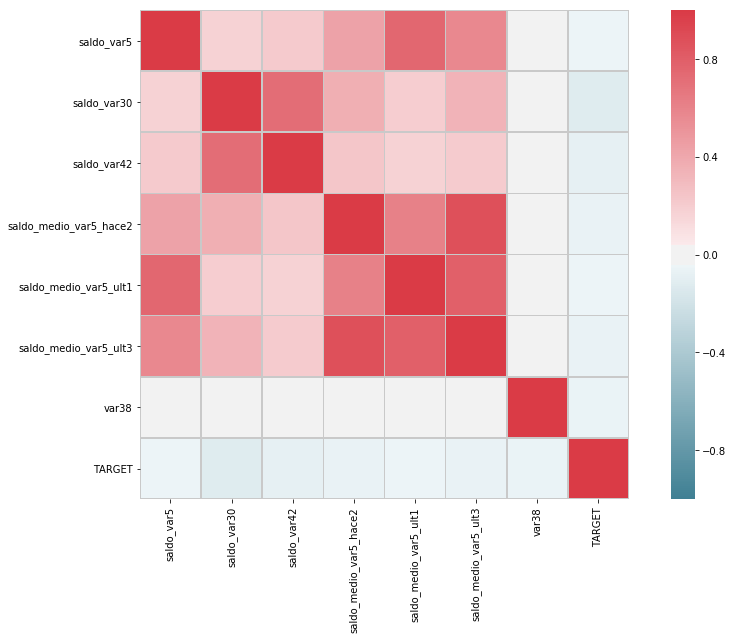

In [28]:
# Colocamos a variável TARGET neste conjunto, calculamos a correlação
continous_vars_corr = df_continous_vars.join(train_sample_y).corr()

# E plotamos um heatmap para auxiliar a compreensão dos dados
fig, axis = plt.subplots(figsize=(15,9))
corr_cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(continous_vars_corr, cmap=corr_cmap,
            linewidths=.5, linecolor='#c9c9c9', vmin=-1, vmax=1,
            square=True, xticklabels=True, yticklabels=True)

Nenhuma dessas variáveis apresentou correlação significativa com a satisfação do cliente, portanto, não utilizaremos nenhuma variável deste grupo

#### Variáveis contínuas - Grupo 2

Não sabemos ainda se as observações deste grupo são de variáveis categóricas codificadas ou variáveis contínuas transformadas:

In [29]:
df_cat_vars = train_sample.loc[:,num_cat_vars]
df_cat_vars.describe().T

,count,mean,std,min,25%,50%,75%,max
num_var4,6016.00,0.90,0.98,0.00,0.00,1.00,1.00,6.00
num_var5,6016.00,1.55,1.51,0.00,0.00,3.00,3.00,6.00
num_var5_0,6016.00,2.85,0.75,0.00,3.00,3.00,3.00,6.00
num_var30,6016.00,1.84,1.70,0.00,0.00,3.00,3.00,12.00
num_var30_0,6016.00,3.24,1.73,0.00,3.00,3.00,3.00,114.00
num_var35,6016.00,2.76,3.08,0.00,0.00,3.00,3.00,27.00
num_var39_0,6016.00,2.64,1.22,0.00,3.00,3.00,3.00,12.00
num_var41_0,6016.00,2.61,1.18,0.00,3.00,3.00,3.00,12.00
num_var42_0,6016.00,3.15,1.59,0.00,3.00,3.00,3.00,114.00
num_var42,6016.00,1.74,1.58,0.00,0.00,3.00,3.00,12.00


In [30]:
#Observando as ocorrências dessas variáveis
for col in df_cat_vars.columns:
    print(df_cat_vars[col].value_counts())

0    2474
1    2250
2     826
3     359
4      88
5      17
6       2
Name: num_var4, dtype: int64
3    3087
0    2914
6      15
Name: num_var5, dtype: int64
3    5622
0     348
6      46
Name: num_var5_0, dtype: int64
3     3262
0     2552
6      183
9       14
12       5
Name: num_var30, dtype: int64
3      5628
6       290
9        75
0        15
12        7
114       1
Name: num_var30_0, dtype: int64
0     2474
3     2238
6      792
9      376
12     103
15      26
18       3
21       3
27       1
Name: num_var35, dtype: int64
3     4970
0      893
6      142
9       10
12       1
Name: num_var39_0, dtype: int64
3     5004
0      897
6      109
9        5
12       1
Name: num_var41_0, dtype: int64
3      5724
6       260
0        21
9         9
114       1
12        1
Name: num_var42_0, dtype: int64
3     3290
0     2630
6       94
9        1
12       1
Name: num_var42, dtype: int64
99    3108
3     1292
1     1031
2      570
0       15
Name: var36, dtype: int64
0    2557
3    2528

* A variável **num_var42** possui um range de 0 a 99, podendo indicar que esta seja uma variável contínua cujo cálculo deve variar entre 0 e 100. Mais da metade dos registros foram classificados como 99;
* As variáveis **num_meses_var5** e **num_meses_var39** possuem um range entre 0 e 3.
* As demais variáveis foram atribuídas com valores múltiplos de 3, sugerindo representar uma periodicidade trimestral.

Precisamos verificar se esses valores possuem alguma correlação com a satisfação do cliente:

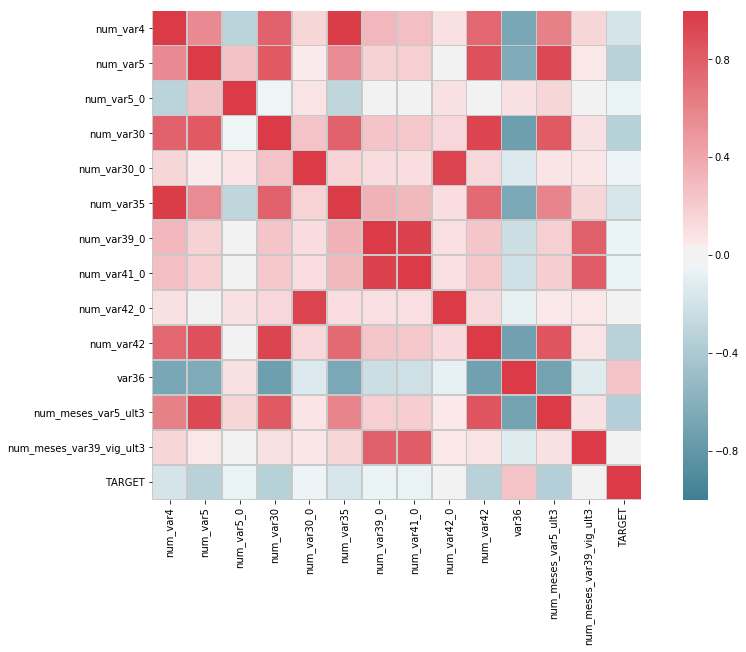

In [31]:
# Colocamos a variável TARGET neste conjunto, calculamos a correlação
cat_vars_corr = df_cat_vars.join(train_sample_y).corr()

# E plotamos um heatmap para auxiliar a compreensão dos dados
fig, axis = plt.subplots(figsize=(15,9))
corr_cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cat_vars_corr, cmap=corr_cmap,
            linewidths=.5, linecolor='#c9c9c9', vmin=-1, vmax=1,
            square=True, xticklabels=True, yticklabels=True)

As variáveis **num_var5**, **num_var30**, **num_var42** e **num_meses_var5_ult3** possuem variação positiva entre sí e variação negativa na variável TARGET, sugerindo que são boas alternativas para classificarmos clientes satisfeitos.

A variável **var36** representou melhor a classificação de clientes insatisfeitos, sugerindo que quanto maior o número observado, maior será a probabilidade classificar este cliente como insatisfeito. Percebemos durante a análise de valores distintos que esta variável possui um range de valores entre 0 e 99:

In [32]:
train_sample.groupby('TARGET')['var36'].value_counts()

TARGET  var36
0       99       1170
        3         924
        1         570
        2         329
        0          15
1       99       1938
        1         461
        3         368
        2         241
Name: var36, dtype: int64

A ausência de outros valores sugere que os números 0, 1, 2, 3 e 99 referem-se a IDs. Contudo, quando observamos essa variável entre clientes insatisfeitos, pecebemos uma presença maior do valor 99.

#### Variáveis contínuas - Grupo 3

In [33]:
df_unkown_vars = train_sample.loc[:, unkown_vars]
df_unkown_vars.describe().T

,count,mean,std,min,25%,50%,75%,max
var3,6016.00,-1825.96,42724.97,-999999.00,2.00,2.00,2.00,225.00
var15,6016.00,36.19,12.84,9.00,25.00,33.00,44.00,102.00


Percebemos que pelo menos 50% dos registros em **var3** estão preenchidos com o número 2 entre os percentis 25 e 75. A presença do valor -999999 causou forte impacto na média e desvio padrão desta variável.

Os registros em **var15** estão espalhados em um range menor e sem valores discrepantes.

In [34]:
df_unkown_vars.var3.value_counts()

 2         5878
 1           15
-999999      11
 8           10
 12           9
 0            7
 4            7
 9            6
 10           6
 14           6
 7            6
 6            6
 3            5
 5            5
 11           5
 13           4
 15           3
 129          2
 116          2
 49           2
 152          1
 53           1
 60           1
 52           1
 28           1
 147          1
 69           1
 121          1
 169          1
 201          1
 111          1
 30           1
 86           1
 114          1
 142          1
 19           1
 23           1
 47           1
 63           1
 87           1
 225          1
Name: var3, dtype: int64

5878 dos 6016 registros (97.7%) foram preenchidos com o mesmo valor. A falta de variação neste registro sugere que não podemos determinar o grau de satisfação de um cliente utilizando esta variável.

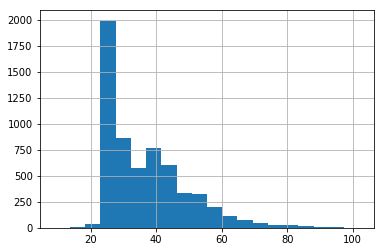

In [35]:
df_unkown_vars.var15.hist(bins=20)

A maior parte dos registros em **var15** concentram-se entre os valores 20 e 40, com cada vez menos observações após este intervalo.

Text(0.5, 1.0, 'Var15 entre clientes satisfeitos')

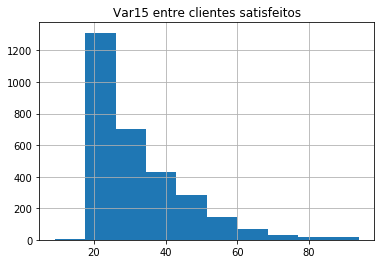

In [36]:
train_sample[train_sample.TARGET == 0].var15.hist()
plt.title('Var15 entre clientes satisfeitos')

Text(0.5, 1.0, 'Var15 entre clientes insatisfeitos')

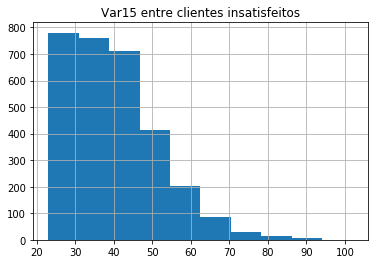

In [37]:
train_sample[train_sample.TARGET == 1].var15.hist()
plt.title('Var15 entre clientes insatisfeitos')

Clientes insatisfeitos possuem uma atribuição maior na **var15**, sugerindo que exista uma correlação positiva entre esta variável e a satisfação do cliente.

Com base nas análises descritas, selecionei as seguintes variáveis:

* ind_var5;
* ind_var8_0;
* ind_var30;
* num_var5;
* num_var30;
* num_var42;
* num_meses_var5_ult3;
* var36;
* var15.

# Criação do modelo preditivo

In [38]:
##Libs adicionais
#Padronização
from sklearn.preprocessing import StandardScaler

#Automação do processo
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Train-test split
from sklearn.model_selection import train_test_split

#Modelos a testar
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#Otimização de hiperparâmetros
from sklearn.model_selection import GridSearchCV

#Métricas de avaliação
from sklearn.metrics import accuracy_score, confusion_matrix

In [39]:
#Carregando dados
colnames = ['ind_var5','ind_var8_0','ind_var30','num_var5',
            'num_var30','num_var42','num_meses_var5_ult3',
            'var36','var15','TARGET']

df_train = pd.read_csv('../input/train.csv', usecols=colnames)

## Pré-processamento

Para este modelo, será necessário apenas padronizar as variáveis em escalas semelhantes:

In [40]:
#Automatizamos o processo com Pipeline e ColumnTransformer
col_prep = ColumnTransformer(transformers=[('Standardize', StandardScaler(), colnames[:-1])])

def exec_pipe(model, X, y):
    model_pipe = Pipeline(steps=[('Prep', col_prep),
                                 ('Model', model)])
    return model_pipe.fit(X, y)

## Separando dados para treino e validação

O treinamento dos modelos preditivos será feito a partir de um conjunto de dados balanceado, de forma que o modelo aprenda a distinguir os padrões que determinam o nível de satisfação de cada cliente.

Utilizaremos os dados de validação para medir a performance de cada modelo:

In [41]:
#Separando o dataset balanceado para treino e validação
unsatisfied_index = df_train[df_train.TARGET > 0].index
satisfied_index = df_train[df_train.TARGET == 0].sample(len(unsatisfied_index), random_state = 5).index
train_sample = pd.concat([df_train.iloc[satisfied_index],df_train.iloc[unsatisfied_index]], axis=0)

X_train, X_valid, y_train, y_valid = train_test_split(train_sample.drop('TARGET', axis=1),
                                                      train_sample.TARGET.ravel(),
                                                      test_size=0.3, train_size=0.7, random_state=7)

### Modelo 1 - Random Forest Classifier (RF)

In [42]:
rf_baseline_model = RandomForestClassifier(n_estimators=100, random_state=11)
rf_params = {'max_depth': [1,2,3,5],
             'min_samples_leaf': [1,5,10,50]}
rf_gridcv = GridSearchCV(rf_baseline_model, rf_params,
                         scoring='accuracy', cv=5, n_jobs=3)

rf_model = exec_pipe(rf_gridcv, X_train, y_train)

/home/gustavo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/gustavo/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [43]:
rf_preds = rf_model.predict(X_valid)
print(confusion_matrix(y_valid, rf_preds))
print(accuracy_score(y_valid, rf_preds))

[[682 235]
 [255 633]]
0.7285318559556787


/home/gustavo/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


### Modelo 2 - Support Vector Classifier (SVC)

In [44]:
svc_baseline_model = SVC(random_state=11)
svc_params = {'C': [0.01, 0.1, 1, 10, 100]}
svc_gridcv = GridSearchCV(svc_baseline_model, svc_params,
                          scoring='accuracy', cv=5, n_jobs=3)

svc_model = exec_pipe(svc_gridcv, X_train, y_train)

/home/gustavo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/gustavo/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [45]:
svc_preds = svc_model.predict(X_valid)
print(confusion_matrix(y_valid, svc_preds))
print(accuracy_score(y_valid, svc_preds))

[[649 268]
 [233 655]]
0.7224376731301939


/home/gustavo/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


### Modelo 3 - Logistic Regression (LR)

In [46]:
lr_baseline_model = LogisticRegression(multi_class='ovr', random_state=11)
lr_params = {'C': [0.01, 0.1, 1, 10, 100]}
lr_gridcv = GridSearchCV(lr_baseline_model, lr_params,
                         scoring='accuracy', cv=5, n_jobs=3)

lr_model = exec_pipe(lr_gridcv, X_train, y_train)

/home/gustavo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/gustavo/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/gustavo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
lr_preds = lr_model.predict(X_valid)
print(confusion_matrix(y_valid, lr_preds))
print(accuracy_score(y_valid, lr_preds))

[[580 337]
 [216 672]]
0.6936288088642659


/home/gustavo/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


## Separando dados para teste

Selecionamos aleatoriamente um novo conjunto de dados para validar a performance de cada modelo:

In [48]:
df_test = df_train.sample(n=30000, random_state=9)

In [49]:
#Teste do modelo RF
rf_test_preds = rf_model.predict(df_test)
print(confusion_matrix(df_test.TARGET, rf_test_preds))
print(accuracy_score(df_test.TARGET, rf_test_preds))

/home/gustavo/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


[[22241  6535]
 [  364   860]]
0.7700333333333333


In [50]:
#Teste do modelo SVC
svc_test_preds = svc_model.predict(df_test)
print(confusion_matrix(df_test.TARGET, svc_test_preds))
print(accuracy_score(df_test.TARGET, svc_test_preds))

/home/gustavo/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


[[21185  7591]
 [  330   894]]
0.7359666666666667


In [51]:
#Teste do modelo LR
lr_test_preds = lr_model.predict(df_test)
print(confusion_matrix(df_test.TARGET, lr_test_preds))
print(accuracy_score(df_test.TARGET, lr_test_preds))

[[18921  9855]
 [  313   911]]
0.6610666666666667


/home/gustavo/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


* Os modelos RF e SVC apresentaram uma performance melhor quando testados com novos dados, sugerindo que não sofreram *Overfitting* durante o treinamento. Contrário a estes dois, o modelo LR apresentou uma performance pior, sugerindo que os dados selecionados não são linearmente separáveis.

* Observando a matriz de confusão, percebemos que o maior problema dos três modelos está na quantidade de falsos positivos (clientes satisfeitos classificados como insatisfeitos).

Dos três modelos concebidos, RF e SVC apresentaram a melhor performance. Selecionarei estes dois para realizar previsões nos dados de testes e submeter o resultados ao Kaggle para avaliar a performance na competição.

## Submetendo resultados ao Kaggle

In [52]:
kaggle_submission_data = pd.read_csv('../input/test.csv', usecols=colnames[:-1])

In [53]:
#Realizando previsões
rf_kaggle_preds = rf_model.predict(kaggle_submission_data)
svc_kaggle_preds = svc_model.predict(kaggle_submission_data)

/home/gustavo/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)
/home/gustavo/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


In [54]:
#Gravando resultados
sample_submission = pd.read_csv('../input/sample_submission.csv')

svc_sample_submission = sample_submission.copy()
svc_sample_submission.TARGET = svc_kaggle_preds
svc_sample_submission.to_csv('../output/svc_sample_submission.csv', index=False)

rf_sample_submission = sample_submission.copy()
rf_sample_submission.TARGET = rf_kaggle_preds
rf_sample_submission.to_csv('../output/rf_sample_submission.csv', index=False)

![sample_submission.png](../output/sample_submission.png)
<div style='text-align: center'>Resultados da competição: SVC acima e RF abaixo</div>

Ambos modelos apresentaram uma performance satisfatória na competição e bem semelhante ao observado durante as etapas de validação e teste.

Para uma próxima versão destes modelos, podemos considerar incluir mais variáveis que melhor representam os clientes satisfeitos, de forma a atenuar a sensibilidade e reduzir a quantidade de classificações incorretas.